In [164]:
# This program was written by Kyle Sargent for the EC2099 Final Project

import numpy as np
import copy
import itertools

class Game:
    #An implementation of cooperative n-player game with arbitrary numbers of strategies per player
    #Has a brute-force solver for Nash equilibria
    
    #payoff tensor has dimension (# of strats of p1, # of strats of p2, ... , # of strats of pn, n)
    def __init__(self, payoff_tensor):
        self.num_players = len(payoff_tensor.shape) - 1
        self.payoff_tensor = payoff_tensor
        #a list of the number of strategies available to each player
        self.strategies = list(payoff_tensor.shape[:-1])
        
    #strategy is a list [s1, s2, ... sn] where si \in range(0, # of strats of pi)
    #player is a number in range(0, n)
    def is_optimal_strategy(self, player, strategy):
        s = copy.copy(strategy)
        payoff = self.payoff_tensor[tuple(s)][player]
        for p_strat in range(0, self.strategies[player]):
            s[player] = p_strat
            new_payoff = self.payoff_tensor[tuple(s)][player]
            if new_payoff > payoff:
                return False
        return True
    
    def is_nasheq(self, strategy):
        t = True
        for player in range(0, self.num_players):
            t = t and self.is_optimal_strategy(player, strategy)
        return t
            
    def nasheqs(self):
        l = [list(s) for s in itertools.product(*[list(range(0, i)) for i in self.strategies])]
        return list(filter(self.is_nasheq, l))
        

In [332]:
#Stag Hunt - A test case

payoff_tensor = np.array([[ [10,10], [0,8] ], [[8,0], [7,7]]])
g = Game(payoff_tensor)
g.nasheqs()

[[0, 0], [1, 1]]

In [402]:
class NBA(Game):
    
    def __init__(self, skills, delta, r, h):
        players = len(skills)
        payoff_tensor = np.zeros(tuple([2] * players + [players]))

        for strategy in itertools.product([0, 1], repeat = players):
            e1 = [j*strategy[p] for p,j in enumerate(skills)]
            v1 = smooth_os(e1)

            e2 = np.array(skills) + r*h(v1)
            v2 = smooth_os(e2)

            payoff_tensor[strategy] = v1 + delta * v2
        
        super().__init__(payoff_tensor)
        self.skills = skills
        self.delta = delta
        self.r = r
        self.h = h

    @staticmethod
    def rd_os(l):
        #gives rounded-down order statistics of an array
        return np.array([np.argsort(np.argsort(l))[list(l).index(i)] for i in l])
    
    @staticmethod
    def smooth_os(l):
        #gives averaged-in-tie order statistics of an array
        lp = list(rd_os(l))
        return np.array([i + .5 * (lp.count(i) - 1) for i in lp])

    def is_tankeq(self, strategy):
        if self.is_nasheq(strategy):
            for player in range(self.num_players):
                strategy2 = copy.copy(strategy)
                strategy2[player] = 1
                if strategy[player] == 0 and not self.is_nasheq(strategy2):
                    return True
        return False
    
    def tankeqs(self):
        return list(filter(lambda x: is_tankeq(self, x), self.nasheqs()))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


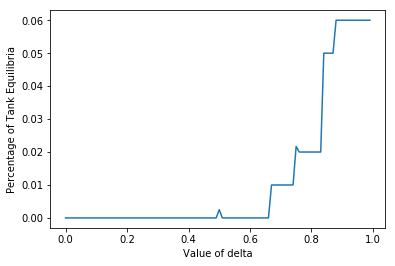

In [468]:
def h(arr):
    return (1 - arr)

def r_simulate(n):
    ptanked_avgs = np.zeros((100))
    num_players = n
    
    for i in range(0,50):
        skills = np.random.normal(size=num_players)**2
        rs = []
        ptankeds = []
        
        print(i)

        for r_iter in range(0, 100):
            r = .1 * r_iter
            delta = .9
            g = NBA(skills, delta, r, h)
            rs += [r]

            ne = g.nasheqs()
            te = list(filter(lambda x : g.is_tankeq(x), ne))

            ptankeds += [len(ne) - len(te)] 

        ptanked_avgs += np.array(ptankeds)

    ptanked_avgs = ptanked_avgs / 100
    return rs, ptanked_avgs

def delta_simulate(n):
    ptanked_avgs = np.zeros((100))
    num_players = n
    
    for i in range(0,50):
        skills = np.random.normal(size=num_players)**2
        ds = []
        ptankeds = []
        
        print(i)

        for d_iter in range(0, 100):
            r = 2
            delta = d_iter * .01
            g = NBA(skills, delta, r, h)
            ds += [delta]

            ne = g.nasheqs()
            te = list(filter(lambda x : g.is_tankeq(x), ne))

            ptankeds += [len(te) / (len(ne) + 1)] 

        ptanked_avgs += np.array(ptankeds)

    ptanked_avgs = ptanked_avgs / 100
    return ds, ptanked_avgs

import matplotlib.pyplot as plt

plt.clf()
    
for n in [5]:
    plt.plot(*delta_simulate(n))
    
plt.xlabel("Value of delta")
plt.ylabel("Percentage of Tank Equilibria")
plt.show()

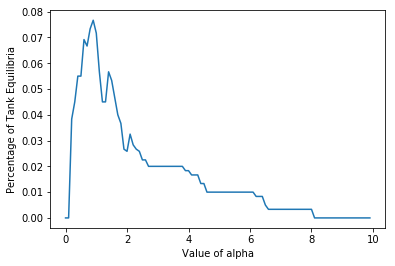

In [447]:
plt.clf()
plt.plot(rs, ptanked_avgs)
plt.xlabel("Value of alpha")
plt.ylabel("Percentage of Tank Equilibria")
plt.show()

[[1, 1, 0, 0, 1]]
